In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_ROOT = "../data/"
READDIR_ROOT = os.path.join(DATA_ROOT, 'processed')
FIGURES_ROOT = '../figures/'

readfile = os.path.join(READDIR_ROOT, 'model-data-mobile-payment.csv')

print(readfile)

../data/processed/model-data-mobile-payment.csv


In [3]:
df_data = pd.read_csv(readfile)

df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 36 columns):
r_weight          1872 non-null float64
pa051_a           1872 non-null float64
pa051_b           1872 non-null float64
pa027_a           1872 non-null float64
pa027_b           1872 non-null float64
pa027_c           1872 non-null float64
pa027_d           1872 non-null float64
pa027_e           1872 non-null float64
pa026             1872 non-null float64
age               1872 non-null float64
edu_lhs           1872 non-null int64
edu_hs            1872 non-null int64
edu_sc            1872 non-null int64
edu_c             1872 non-null int64
edu_pgs           1872 non-null int64
inc_lt25          1872 non-null float64
inc_2549          1872 non-null float64
inc_5074          1872 non-null float64
inc_7599          1872 non-null float64
inc_100124        1872 non-null float64
inc_125199        1872 non-null float64
inc_gt200         1872 non-null float64
MPay_label        1872 

,r_weight,pa051_a,pa051_b,pa027_a,pa027_b,pa027_c,pa027_d,pa027_e,pa026,age,...,IncLevel_label,AgeLevel_label,white_label,MPay,CPay,MBank,EdLevel,IncLevel,AgeLevel,white
0,48.407444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,...,"Less than $25,000",55-64 years,Yes,0,0,0,2,1,5,1
1,19.693514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,...,"$25,000-$49,999 per year",55-64 years,Yes,0,0,0,3,2,5,1
2,27.521273,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,70.0,...,"$25,000-$49,999 per year",More than 65,Yes,0,1,1,3,2,6,1
3,21.771318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,...,"$100,000-$124,999 per year",55-64 years,Yes,0,0,0,3,5,5,1
4,12.004013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,...,"$75,000-$99,999 per year",45-54 years,Yes,0,0,0,5,4,4,1


In [12]:
df_data.iloc[:,30:].columns

Index(['CPay', 'MBank', 'EdLevel', 'IncLevel', 'AgeLevel', 'white'], dtype='object')

In [21]:
predictor_cols = df_data.iloc[:,30:].columns
predictor_label_cols = list(df_data.iloc[:,23:29].columns)
response_col = 'MPay'
response_label_col = 'MPay_label'

In [4]:
def sort_pairwise_correlation(X_train):
    """
    Calculates a correlation matrix of all input predictors and observations,
    via the X_train dataframe, then returns a sorted dataframe of all
    pairwise correlation values (duplicates and same-value pairings removed).
    
    The returned sorted correlation summary dataframe is sorted in descending
    order, from highest to lowest correlation pairings.
    
    X_train: pd.DataFrame containing the predictors to be evaluates
    
    returns: pd.DataFrame of unique pairwise correlations
    """
    # calculate correlation among all predictors
    correlation_matrix_df = X_train.corr()
    correlation_abs_matrix_df = X_train.corr().abs()

    # identify variables most heavily correlated in descending order
    # and remove pairwise groupings of the same predictors
    corr_unstack = correlation_abs_matrix_df.unstack()
    corr_sorted = corr_unstack.sort_values(ascending=False)
    corr_sorted = corr_sorted[corr_sorted < 1][::2]
    
    return corr_sorted

In [14]:
#############################################
## Calculate and report on pairwise correlations
#############################################

# generate sorted correlation dataframe
corr_df = sort_pairwise_correlation(df_data[predictor_cols])

# set corr threshold for reporting
corr_thresh = 0

print(
    '\nThe most strongly correlated predictors (corr > {0:.2f}) in our baseline model '\
    'predictor set and their corresponding correlation values are:\n\n{1}\n'.format(
        corr_thresh,
        corr_df[corr_df > corr_thresh],
    )
)


The most strongly correlated predictors (corr > 0.00) in our baseline model predictor set and their corresponding correlation values are:

EdLevel   IncLevel    0.385798
AgeLevel  MBank       0.212087
          white       0.201132
CPay      white       0.107414
MBank     CPay        0.105247
CPay      AgeLevel    0.087220
white     MBank       0.084169
IncLevel  MBank       0.081254
          CPay        0.069857
          white       0.068805
EdLevel   CPay        0.065055
AgeLevel  EdLevel     0.051746
IncLevel  AgeLevel    0.023559
white     EdLevel     0.010335
MBank     EdLevel     0.003224
dtype: float64



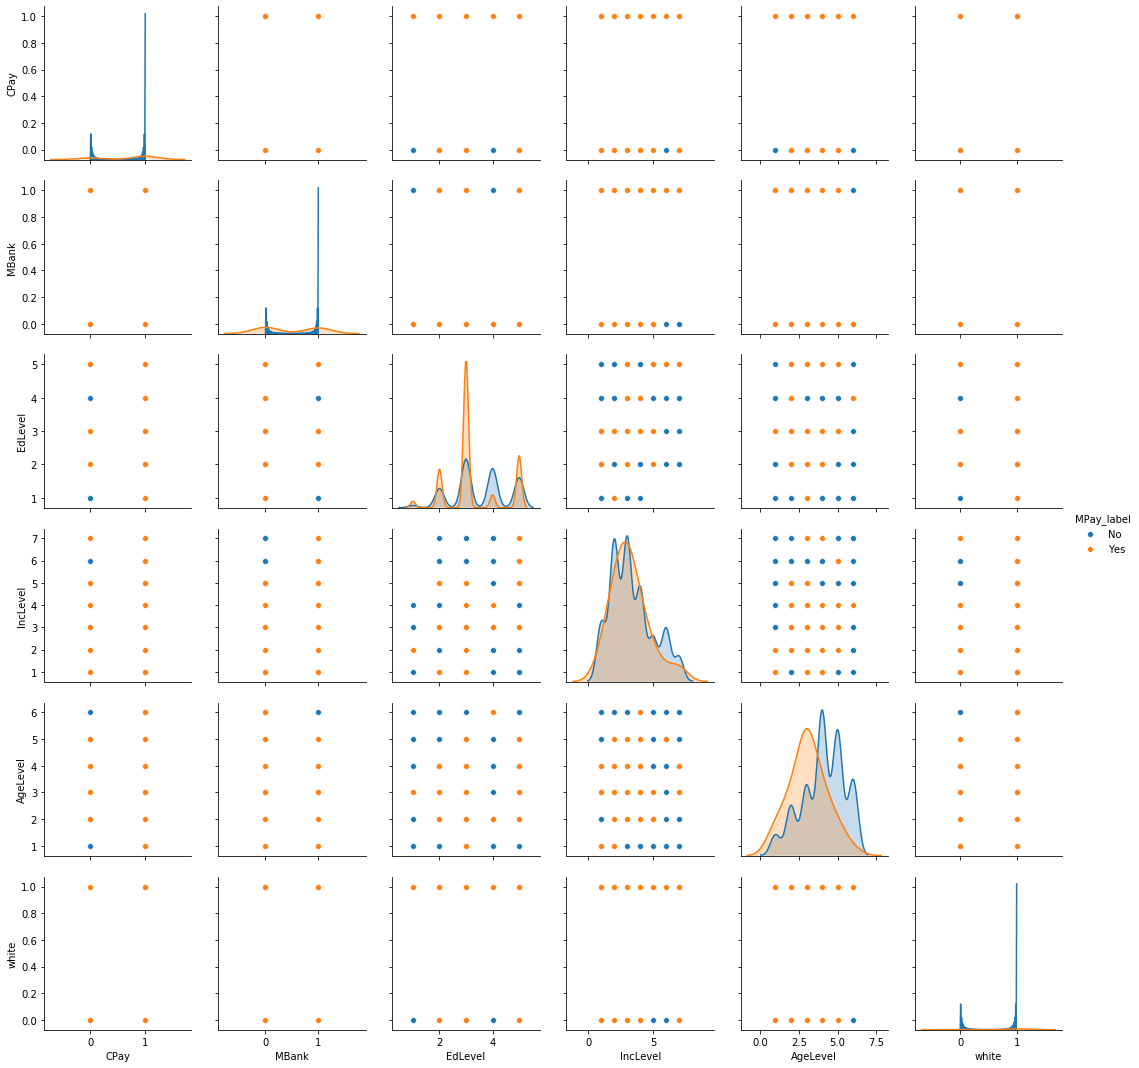

CPU times: user 7.97 s, sys: 8 ms, total: 7.98 s
Wall time: 7.97 s


In [30]:
%%time

savefig = False

# plot a scatter matrix of unique values for each predictor
# fig = plt.figure(figsize=(12,12))
# sns.set_context(font_scale=12, rc={"axes.labelsize":10})
sns.pairplot(df_data[[*predictor_cols, response_label_col]], hue=response_label_col)
# plt.suptitle(
#     'Pairwise relationships of all unique predictors with correlation ',
#     fontsize=24
# )
# plt.tight_layout(rect=[0, 0.03, 1, 0.96])
if savefig:
    plt.savefig(os.path.join(FIGURES_ROOT, 'correlation-scatter-matrix-most-correlated-predictors.png'))
plt.show();

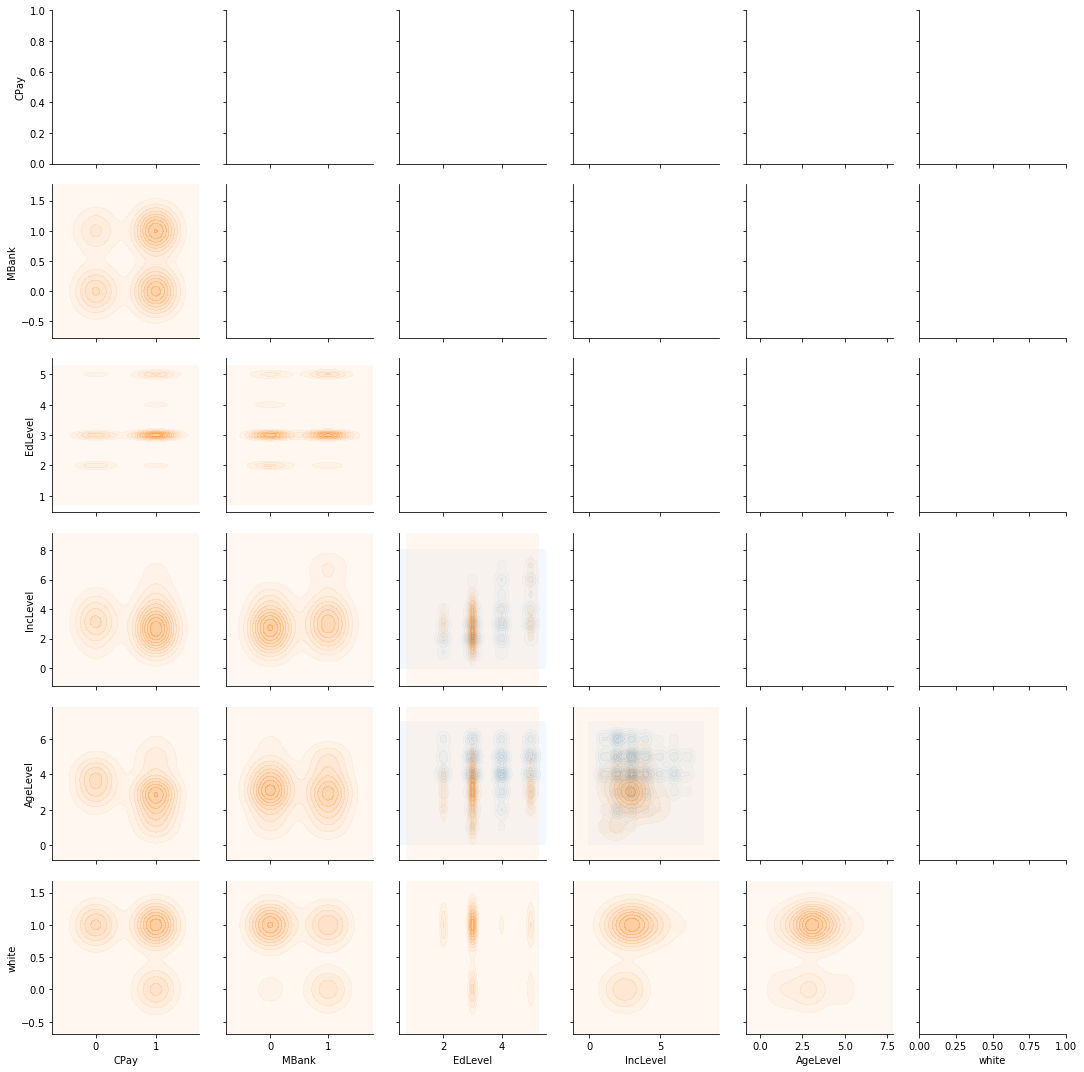

In [47]:
g = sns.PairGrid(df_data[[*predictor_cols, response_label_col]], hue=response_label_col)
# g = g.map_lower(plt.scatter, alpha=.4)
# g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot, shade=True, alpha=.4) #, cmap="Blues_d")